In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import os 

import pandas as pd
# use TeX
plt.rc('text', usetex=True)

### Steps

* Make a circle of radius 1, centered at $-(1+\delta), 0$ and radius 1. 
* This circle starts at $\pi$ and ends at $\phi_{c1}$, where $\phi_{c1}$ is
$$ \phi_{c1} = \sin^{-1}\left(2\delta\right) $$

* The fillet circle starts at $\phi_{c1}$. The center of this circle lies on the intersection $x = 0$ and $y = tan(\phi_{c1})(x+(1+\delta))$ (line joining the center of circle 1 to the point where it ends). This gives: 
$$Y_{f,c} = (1+\delta)\tan\left(\phi_{c1}\right) $$
* The radius of this fillet circle is $R_{f} = \frac{1+\delta}{cos(\phi_{c1})} - 1$.
* For the end point of this circle, we ensure that it can connect seemlessly to the next circle. This gives us the angle $\theta$ as
$$\theta = \sin^{-1}\left(\frac{Y_{f,c}}{R_r+R_f}\right)$$ 

* Fillet circle ends at $-\left(\pi/2-\theta\right)$

* Now, we make a circle of radius $R_r$. This circle has a center at $(X_{2c}, 0)$

$$X_{2c} = \left(R_f+R_r\right)\cos(\theta)$$


* This second circle starts at $\pi - \theta$ and ends at $0$.

A schematic of the process is given in [Initial condition unequal sized drops_bubbles.pdf](Initial%20condition%20unequal%20sized%20drops_bubbles.pdf)


### Test

In [ ]:
delta = 1e-2

X1c = -(1+delta)
# X2c = (delta+Rr)

# phic is the angle where y coordinate is $2\delta$
phic1 = np.arcsin(2*delta)
phi1 = np.linspace(np.pi, phic1, int(1e3))
X1 = X1c+np.cos(phi1)
Y1 = np.sin(phi1)

# fillet circle
Yfc = (1+delta)*np.tan(phic1)
Rf = (1+delta)/np.cos(phic1) - 1

phifStart = np.pi/2-phic1
phifEnd = np.pi/2

phif = np.linspace(phifStart, -phifEnd, int(1e3))
Xf = -Rf*np.sin(phif)
Yf = Yfc-Rf*np.cos(phif)

# final circle
X1 = -(X1-Xf[-1])
Xf = -(Xf-Xf[-1])


X2 = Xf[-1]*np.ones(len(X1))
Y2 = np.linspace(Yf[-1], 16, len(X1))

# plot this circle
plt.close()
fig, axs = plt.subplots(2, 2, figsize=(24,12))
ax1, ax2, ax3, ax4 = axs.flatten()
NWidth = 10
xWindow1, xWindow2, yWindow1, YWindow2 = -NWidth*delta, NWidth*delta, 0, NWidth*delta
NWidth = 5
xWindow3, xWindow4, yWindow3, YWindow4 = -NWidth*delta, NWidth*delta, 0, NWidth*delta
NWidth = 1
xWindow5, xWindow6, yWindow5, YWindow6 = -NWidth*delta, NWidth*2*delta, delta, NWidth*2*delta+delta

ax1.plot(X1, Y1, '-', lw=2, color='#fdae61')
ax1.plot(Xf, Yf, '-', lw=2, color='#d7191c')
ax1.plot(X2, Y2, '-', lw=2, color='#2c7bb6')

ax1.plot([xWindow1, xWindow2, xWindow2, xWindow1, xWindow1], [yWindow1, yWindow1, YWindow2, YWindow2, yWindow1], 'k-', lw=2)
ax1.axis('square')
ax1.set_xlim(-delta, delta+2+Rf+0.1)
ax1.set_ylim(0, 1.1)
ax1.set_xlabel('$\mathcal{Z}$', fontsize=24)
ax1.set_ylabel('$\mathcal{R}$', fontsize=24)
ax1.tick_params(axis='both', which='major', labelsize=24)
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

ax2.plot([xWindow1, xWindow2, xWindow2, xWindow1, xWindow1], [yWindow1, yWindow1, YWindow2, YWindow2, yWindow1], 'k-', lw=4)
ax2.plot(X1, Y1, '-', lw=4, color='#fdae61')
ax2.plot(Xf, Yf, '-', lw=4, color='#d7191c')
ax2.plot(X2, Y2, '-', lw=4, color='#2c7bb6')

ax2.plot([xWindow3, xWindow4, xWindow4, xWindow3, xWindow3], [yWindow3, yWindow3, YWindow4, YWindow4, yWindow3], '-', lw=2, color='gray')
ax2.axis('square')
ax2.set_xlim(xWindow1, xWindow2)
ax2.set_ylim(yWindow1, YWindow2)
ax2.axis('off')

ax3.plot([xWindow3, xWindow4, xWindow4, xWindow3, xWindow3], [yWindow3, yWindow3, YWindow4, YWindow4, yWindow3], '-', lw=4, color='gray')
ax3.plot(X1, Y1, '-', lw=4, color='#fdae61')
ax3.plot(Xf, Yf, '-', lw=4, color='#d7191c')
ax3.plot(X2, Y2, '-', lw=4, color='#2c7bb6')

ax3.plot([0, 0], [0, YWindow4], '-', lw=2, color='gray')
ax3.plot([xWindow5, xWindow6, xWindow6, xWindow5, xWindow5], [yWindow5, yWindow5, YWindow6, YWindow6, yWindow5], '-', lw=2, color='#abdda4')
ax3.axis('square')
ax3.set_xlim(xWindow3, xWindow4)
ax3.set_ylim(yWindow3, YWindow4)
ax3.axis('off')

ax4.plot([xWindow5, xWindow6, xWindow6, xWindow5, xWindow5], [yWindow5, yWindow5, YWindow6, YWindow6, yWindow5], '-', lw=4, color='#abdda4')
ax4.plot(X1, Y1, '-', lw=4, color='#fdae61')
ax4.plot(Xf, Yf, '-', lw=4, color='#d7191c')
ax4.plot(X2, Y2, '-', lw=4, color='#2c7bb6')

ax4.axis('square')
ax4.set_xlim(xWindow5, xWindow6)
ax4.set_ylim(yWindow5, YWindow6)
ax4.axis('off')
plt.savefig('Test.pdf', bbox_inches='tight')
plt.show()


In [ ]:
min(Yf/delta)

### Function to generate the two circles and a line

In [8]:
def GetCircles(delta):

  X1c = -(1+delta)
  # phic is the angle where y coordinate is $2\delta$
  phic1 = np.arcsin(2*delta)
  phi1 = np.linspace(np.pi, phic1, int(1e3))
  X1 = X1c+np.cos(phi1)
  Y1 = np.sin(phi1)

  phi = np.linspace(np.pi, 0.0, int(1e3))
  X1Full = X1c+np.cos(phi)
  Y1Full = np.sin(phi)

  # fillet circle
  Yfc = (1+delta)*np.tan(phic1)
  Rf = (1+delta)/np.cos(phic1) - 1

  phifStart = np.pi/2-phic1
  phifEnd = np.pi/2

  phif = np.linspace(phifStart, -phifEnd, int(1e3))
  Xf = -Rf*np.sin(phif)
  Yf = Yfc-Rf*np.cos(phif)

  # final circle
  X1 = -(X1-Xf[-1])
  X1Full = -(X1Full-Xf[-1])
  Xf = -(Xf-Xf[-1])

  X2 = Xf[-1]*np.ones(len(X1))
  Y2 = np.linspace(Yf[-1], 16, len(X1))

  X, Y = X1, Y1
  X = np.append(X, Xf)
  Y = np.append(Y, Yf)
  X = np.append(X, X2)
  Y = np.append(Y, Y2)

  Interface = pd.DataFrame({'x': X, 'y': Y})
  Circle1 = pd.DataFrame({'x': X1Full, 'y': Y1Full})
  

  return Interface, X1, Y1, Xf, Yf, X2, Y2, Circle1, X1Full, Y1Full

### Function to run Basilisk to check the initial condition

In [3]:
def gettingFacets(L0):
    import subprocess as sp
    exe = ["./InitialCondition", str(L0)]
    p = sp.Popen(exe, stdout=sp.PIPE, stderr=sp.PIPE)
    stdout, stderr = p.communicate()
    temp1 = stderr.decode("utf-8")
    temp2 = temp1.split("\n")
    segs = []
    skip = False
    if (len(temp2) > 1e2):
        for n1 in range(len(temp2)):
            temp3 = temp2[n1].split(" ")
            if temp3 == ['']:
                skip = False
                pass
            else:
                if not skip:
                    temp4 = temp2[n1+1].split(" ")
                    r1, z1 = np.array([float(temp3[1]), float(temp3[0])])
                    r2, z2 = np.array([float(temp4[1]), float(temp4[0])])
                    segs.append(((z1, r1),(z2,r2)))
                    skip = True
    return segs

### Function to visualize the initial condition without Basilisk

In [4]:
def PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, X1Full, Y1Full, delta, ImageName, PLOT):
  plt.close()
  fig, axs = plt.subplots(2, 2, figsize=(24,12))
  ax1, ax2, ax3, ax4 = axs.flatten()
  NWidth = 10
  xWindow1, xWindow2, yWindow1, YWindow2 = -NWidth*delta, NWidth*delta, 0, NWidth*delta
  NWidth = 5
  xWindow3, xWindow4, yWindow3, YWindow4 = -NWidth*delta, NWidth*delta, 0, NWidth*delta
  NWidth = 1
  xWindow5, xWindow6, yWindow5, YWindow6 = -NWidth*delta, NWidth*2*delta, delta, NWidth*2*delta+delta

  # ax1.plot(Interface['x'], Interface['y'], 'k-', lw=4)
  ax1.plot(X1, Y1, '-', lw=2, color='#fdae61')
  ax1.plot(Xf, Yf, '-', lw=2, color='#d7191c')
  ax1.plot(X2, Y2, '-', lw=2, color='#2c7bb6')
  ax1.plot(X1Full, Y1Full, '-', lw=2, color='k')

  ax1.plot([xWindow1, xWindow2, xWindow2, xWindow1, xWindow1], [yWindow1, yWindow1, YWindow2, YWindow2, yWindow1], 'k-', lw=2)
  ax1.axis('square')
  ax1.set_xlim(-delta, delta+2+0.5)
  ax1.set_ylim(0, 1.1)
  ax1.set_xlabel('$\mathcal{Z}$', fontsize=24)
  ax1.set_ylabel('$\mathcal{R}$', fontsize=24)
  ax1.tick_params(axis='both', which='major', labelsize=24)
  for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)

  ax2.plot([xWindow1, xWindow2, xWindow2, xWindow1, xWindow1], [yWindow1, yWindow1, YWindow2, YWindow2, yWindow1], 'k-', lw=4)
  ax2.plot(X1, Y1, '-', lw=4, color='#fdae61')
  ax2.plot(Xf, Yf, '-', lw=4, color='#d7191c')
  ax2.plot(X2, Y2, '-', lw=4, color='#2c7bb6')

  ax2.plot([xWindow3, xWindow4, xWindow4, xWindow3, xWindow3], [yWindow3, yWindow3, YWindow4, YWindow4, yWindow3], '-', lw=2, color='gray')
  ax2.axis('square')
  ax2.set_xlim(xWindow1, xWindow2)
  ax2.set_ylim(yWindow1, YWindow2)
  ax2.axis('off')

  ax3.plot([xWindow3, xWindow4, xWindow4, xWindow3, xWindow3], [yWindow3, yWindow3, YWindow4, YWindow4, yWindow3], '-', lw=4, color='gray')
  ax3.plot(X1, Y1, '-', lw=4, color='#fdae61')
  ax3.plot(Xf, Yf, '-', lw=4, color='#d7191c')
  ax3.plot(X2, Y2, '-', lw=4, color='#2c7bb6')

  ax3.plot([0, 0], [0, YWindow4], '-', lw=2, color='gray')
  ax3.plot([xWindow5, xWindow6, xWindow6, xWindow5, xWindow5], [yWindow5, yWindow5, YWindow6, YWindow6, yWindow5], '-', lw=2, color='#abdda4')
  ax3.axis('square')
  ax3.set_xlim(xWindow3, xWindow4)
  ax3.set_ylim(yWindow3, YWindow4)
  ax3.axis('off')

  ax4.plot([xWindow5, xWindow6, xWindow6, xWindow5, xWindow5], [yWindow5, yWindow5, YWindow6, YWindow6, yWindow5], '-', lw=4, color='#abdda4')
  ax4.plot(X1, Y1, '-', lw=4, color='#fdae61')
  ax4.plot(Xf, Yf, '-', lw=4, color='#d7191c')
  ax4.plot(X2, Y2, '-', lw=4, color='#2c7bb6')

  ax4.axis('square')
  ax4.set_xlim(xWindow5, xWindow6)
  ax4.set_ylim(yWindow5, YWindow6)
  ax4.axis('off')
  plt.savefig(ImageName, bbox_inches='tight')
  if PLOT:
    plt.show()
  else:
    plt.close()

### Function to visualize the initial condition with Basilisk

In [5]:
def PlotInterfacesBas(Interface, InterfaceBas, delta, ImageName, PLOT):
  plt.close()
  fig, axs = plt.subplots(2, 2, figsize=(24,12))
  ax1, ax2, ax3, ax4 = axs.flatten()
  NWidth = 10
  xWindow1, xWindow2, yWindow1, YWindow2 = -NWidth*delta, NWidth*delta, 0, NWidth*delta
  NWidth = 5
  xWindow3, xWindow4, yWindow3, YWindow4 = -NWidth*delta, NWidth*delta, 0, NWidth*delta
  NWidth = 1
  xWindow5, xWindow6, yWindow5, YWindow6 = -NWidth*delta, NWidth*2*delta, delta, NWidth*2*delta+delta

  ax1.plot(Interface['x'], Interface['y'], '-', lw=4, color='#fdae61')
  line_segments = LineCollection(InterfaceBas, linewidths=4, colors='#1a9641', linestyle='solid')
  ax1.add_collection(line_segments)

  ax1.plot([xWindow1, xWindow2, xWindow2, xWindow1, xWindow1], [yWindow1, yWindow1, YWindow2, YWindow2, yWindow1], 'k-', lw=2)
  ax1.axis('square')
  ax1.set_xlim(-delta, delta+2+0.5)
  ax1.set_ylim(0, 1.1)
  ax1.set_xlabel('$\mathcal{Z}$', fontsize=24)
  ax1.set_ylabel('$\mathcal{R}$', fontsize=24)
  ax1.tick_params(axis='both', which='major', labelsize=24)
  for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)

  ax2.plot([xWindow1, xWindow2, xWindow2, xWindow1, xWindow1], [yWindow1, yWindow1, YWindow2, YWindow2, yWindow1], 'k-', lw=4)

  ax2.plot(Interface['x'], Interface['y'], '-', lw=4, color='#fdae61')
  line_segments = LineCollection(InterfaceBas, linewidths=4, colors='#1a9641', linestyle='solid')
  ax2.add_collection(line_segments)

  ax2.plot([xWindow3, xWindow4, xWindow4, xWindow3, xWindow3], [yWindow3, yWindow3, YWindow4, YWindow4, yWindow3], '-', lw=2, color='gray')
  ax2.axis('square')
  ax2.set_xlim(xWindow1, xWindow2)
  ax2.set_ylim(yWindow1, YWindow2)
  ax2.axis('off')

  ax3.plot([xWindow3, xWindow4, xWindow4, xWindow3, xWindow3], [yWindow3, yWindow3, YWindow4, YWindow4, yWindow3], '-', lw=4, color='gray')
  ax3.plot(Interface['x'], Interface['y'], '-', lw=4, color='#fdae61')
  line_segments = LineCollection(InterfaceBas, linewidths=4, colors='#1a9641', linestyle='solid')
  ax3.add_collection(line_segments)

  ax3.plot([0, 0], [0, YWindow4], '-', lw=2, color='gray')
  ax3.plot([xWindow5, xWindow6, xWindow6, xWindow5, xWindow5], [yWindow5, yWindow5, YWindow6, YWindow6, yWindow5], '-', lw=2, color='#abdda4')
  ax3.axis('square')
  ax3.set_xlim(xWindow3, xWindow4)
  ax3.set_ylim(yWindow3, YWindow4)
  ax3.axis('off')

  ax4.plot([xWindow5, xWindow6, xWindow6, xWindow5, xWindow5], [yWindow5, yWindow5, YWindow6, YWindow6, yWindow5], '-', lw=4, color='#abdda4')
  ax4.plot(Interface['x'], Interface['y'], '-', lw=4, color='#fdae61')
  line_segments = LineCollection(InterfaceBas, linewidths=4, colors='#1a9641', linestyle='solid')
  ax4.add_collection(line_segments)

  ax4.axis('square')
  ax4.set_xlim(xWindow5, xWindow6)
  ax4.set_ylim(yWindow5, YWindow6)
  ax4.axis('off')
  plt.savefig(ImageName, bbox_inches='tight')

  if PLOT:
    plt.show()
  else:
    plt.close()

### Main code

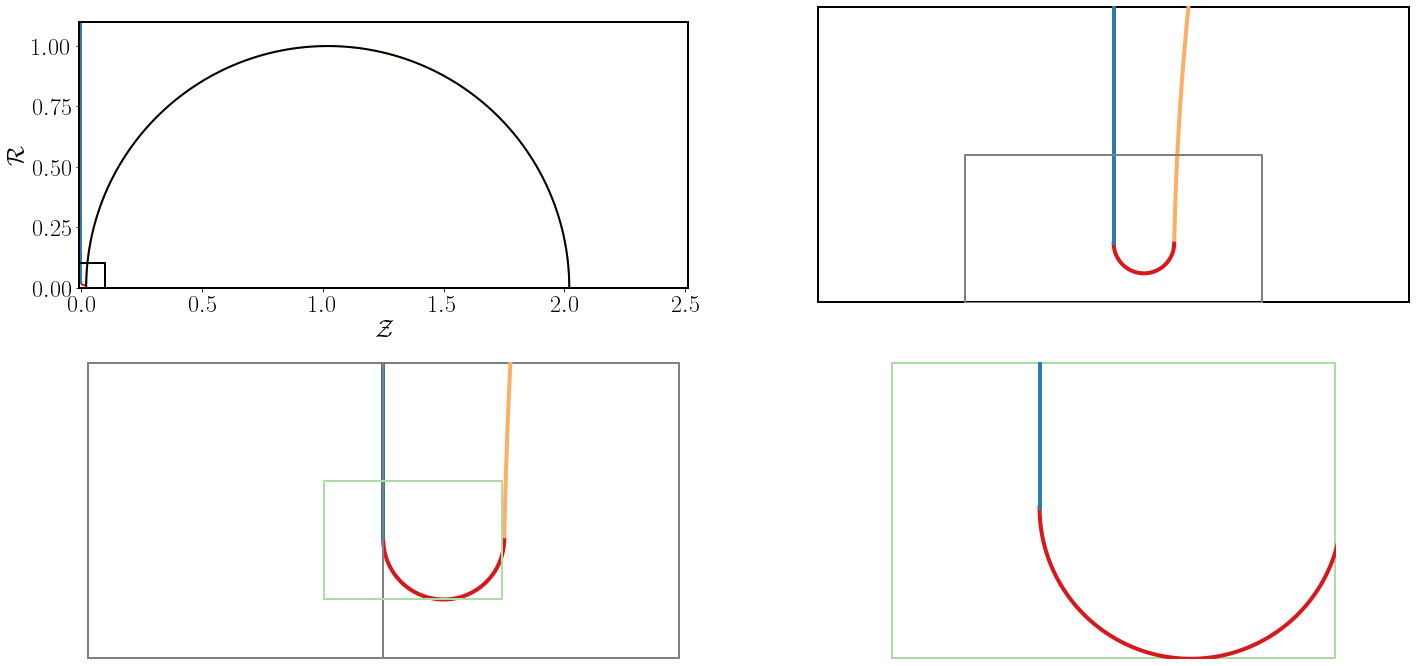

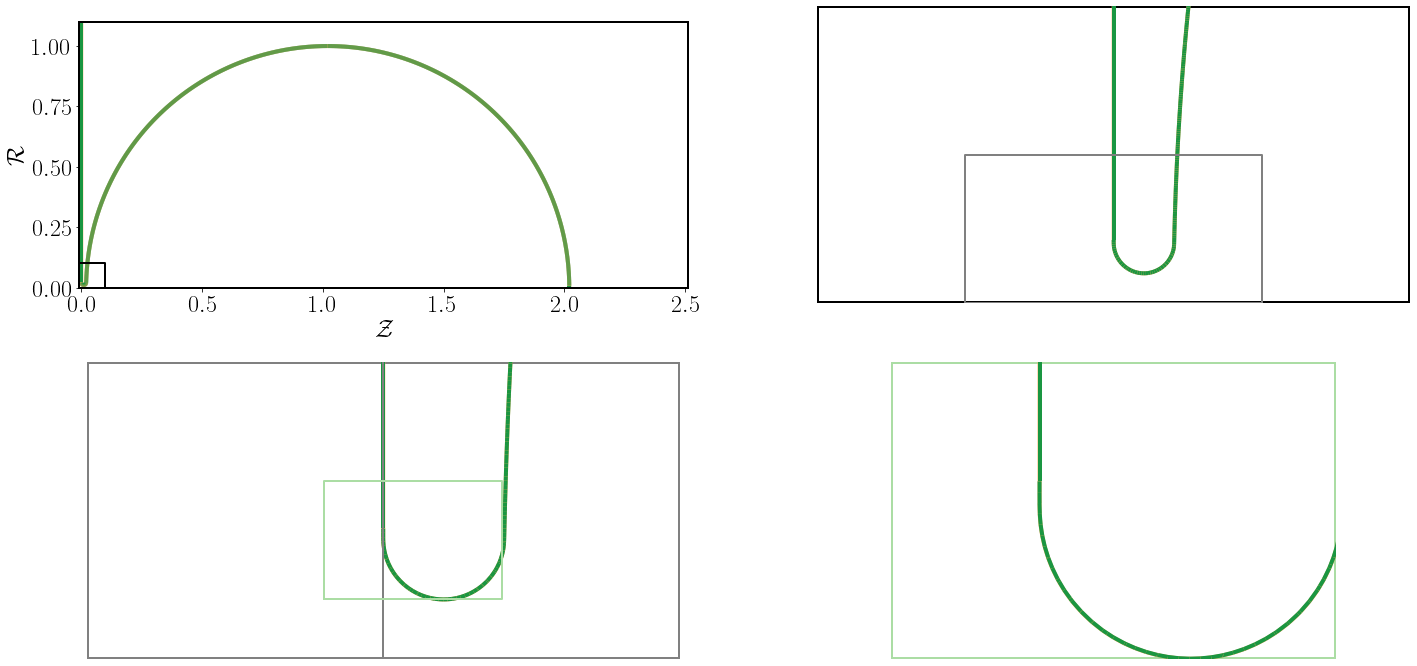

In [9]:
# delta is the smallest length scale -> Neck radius. 2*delta is sepration between the two drops/bubbles
# Rr is the radius ratio of the two drops/bubbles -- big to small.
delta = 1e-2

Interface, X1, Y1, Xf, Yf, X2, Y2, Circle1, X1Full, Y1Full = GetCircles(delta)

# Plot the two circles in raw form
ImageName = 'TestWithoutBasilisk_delta-%3.2f.pdf' % delta
PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, X1Full, Y1Full, delta, ImageName, PLOT=True)

# Save Interface in a data file withouth header
FileName = 'f1_init-%3.2f.dat' % delta
Interface.to_csv(FileName, index=False, header=False, sep=' ')
FileName = 'f2_init-%3.2f.dat' % delta
Circle1.to_csv(FileName, index=False, header=False, sep=' ')

Interface.to_csv("f_Testing.dat", index=False, header=False, sep=' ')
# print(Interface.head())

# get facets from Basilisk
facets = gettingFacets(3)

# compare the two interfaces -> from Basilisk and raw!
ImageName = 'TestWithBasilisk_delta-%3.2f.pdf' % delta
PlotInterfacesBas(Interface, facets, delta, ImageName, PLOT=True)

In [10]:
print(min(Yf)/delta)

1.0001985059654905


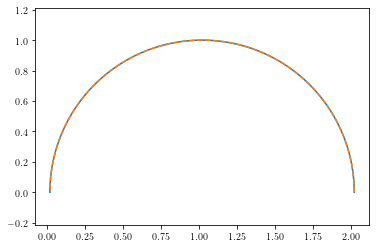

In [14]:
plt.plot(Circle1['x'], Circle1['y'], '-')
plt.plot(X1, Y1, '--')
# make plot axis equal
plt.axis('equal')
plt.show()